# 遗传算法


回忆优化算法三要素：

- **变量**（Decision Variable）
- **约束条件**（Constraints）
- **目标函数**（Objective function）

采用最优化算法解决实际问题主要分为下列两步：

1. 建立数学模型。对可行方案进行编码（就是确定变量），约束条件以及目标函数的构造。
2. 指定最优值的搜索策略。有精确算法、穷举、随机和启发式搜索方法等。


例如，对于一组可以用列向量表示的变量

$$
X = \left[ x_1,x_2,x_3,\cdots,x_n  \right]^T
$$

我们的目的是寻找目标函数的最大或最小值

$$
\max f(X)  \quad \text{or} \quad  \min f(X)
$$

此时通常需要满足一定的约束条件，约束条件可分为等式约束和不等式约束：


$$
s.t. \begin{cases}
g_{i}(X) \leq 0   \quad (i = 1,2, \ldots, n)\\
h_{j}(X)=0 \quad (j=1,2, \ldots, m)\end{cases}
$$


此外，根据自变量的情况，也可以将最优化问题分为**函数优化问题**和**组合优化问题**两大类，其中函数优化的对象是一定区间的连续变量，而组合优化的对象则是解空间中的离散状态。其中典型的组合优化问题有。

- 旅行商(Traveling salesman problem,TSP)问题
- 加工调度问题(Scheduling problem,如Flow-shop,Job-shop)
- 0-1背包问题(Knapsack problem)
- 装箱问题(Bin packing problem)
- 图着色问题(Graph coloring problem)
- 聚类问题(Clustering problem)等


## TSP问题

已知敌方100个目标的经度、纬度如下表所示。

![Image Name](https://cdn.kesci.com/upload/image/q3w4cm6jo6.png?imageView2/0/w/960/h/960)

![Image Name](https://cdn.kesci.com/upload/image/q3w4ctq050.png?imageView2/0/w/960/h/960)


已知我方有一个基地，经度和纬度为$(70,40)$。假设我方飞机的速度为$1000公里/小时$。我方派一架飞机从基地出发，侦察完敌方所有目标，再返回原来的基地。在敌方每一目标点的侦察时间不计，求该架飞机所花费的最短时间（假设我方飞机巡航时间可以充分长）。


我们依次给基地编号为$1$，敌方目标依次编号为$2,3,\cdots,101$，最后我方基地再重复编号为 $102$。设距离矩阵为

$$
D=\left(d_{i j}\right)_{102 \times 102}
$$

其中，$d_{ij}$表示$i,j$两点之间的距离$(i, j=1,2, \cdots, 102)$。

则问题是求一个从点1 出发，走遍所有中间点，到达点102 的一个最短路径。


将上述问题抽象为即为**旅行商问题 ( TSP,Traveling Salesman Problem )** ：有N个城市，要求从其中某个城市出发，唯一遍历所有城市，再回到出发的城市，求最短的路线。

旅行商问题属于所谓的**NP完全问题**（是世界七大数学难题之一。NP的英文全称是Non-deterministic Polynomial的问题，即多项式复杂程度的非确定性问题），**精确的解决TSP只能通过穷举所有的路径组合**，其时间复杂度是$O(N!)$ 。

也就是说，针对以上问题，如果我们使用穷举的方法，需要计算$A_{102}^{102} = 102!$种情况，然后选择一个最好的解，但这种方法的计算量显然是无法接受的。我们称类似的问题为NP-hard 组合优化问题。针对这类问题，我们可以考虑采用现代优化算法进行求解。


## 现代优化算法及其分类


现代优化算法是 80 年代初兴起的启发式算法。这些算法包括

- 禁忌搜索（tabu search）
- 模拟退火（simulated annealing）
- 遗传算法（genetic algorithms）
- 人工神经网络（neural networks）等

它们主要用于解决大量的实际应用问题。目前，这些算法在理论和实际应用方面得到了较大的发展。现代启发式算法在优化机制方面存在一定的差异,但在优化流程上却具有较大的相似性,均是一种**“邻域搜索”**结构。算法都是从一个(一组)初始解出发,在算法的关键参数的控制下通过邻域函数产生若干邻域解,按接受准则(确定性、概率性或混沌方式)更新当前状态,而后按关键参数修改准则调整关键参数。如此重复上述搜索步骤直到满足算法的收敛准则,最终得到问题的优化结果。

启发式算法包含的算法很多，例如解决复杂优化问题的蚁群算法。有些启发式算法是根据实际问题而产生的，如解空间分解、解空间的限制等；另一类算法是集成算法，这些算法是诸多启发式算法的合成。


我们通常把启发式算法分为以下四类：

- 基于随机选择
	- 通过随机选择之后进行筛选
	
- 基于贪心算法
	- 通过每一步尝试最优策略
	
- 基于元启发式算法
	- 通过已有的较优解迭代
	- 基于禁忌搜索、基于遗传算法、基于遗传编程、基于蚁群算法

- 基于学习
	- 通过构造参数学习函数或特征匹配
	- 深度学习、机器学习


本节课程中，我们将会学习启发式算法中的两个最经典的算法：**遗传算法和模拟退火算法**。这里我们先展开遗传算法的学习。


## 遗传算法介绍


遗传算法（Genetic Algorithm）是模拟达尔文生物进化论的自然选择和遗传学机理的生物进化过程的计算模型，是一种通过模拟自然进化过程搜索最优解的方法。遗传算法是在20世纪六七十年代由美国密歇根大学的 Holland教授创立。


 ```{figure} ../_static/lecture_specific/ga/dna.png
---
height: 350px
name: dna
---
```


遗传算法是一种仿生算法，最主要的思想是**物竞天择，适者生存**。这个算法很好的模拟了生物的进化过程，保留好的物种，同样一个物种中的佼佼者才会幸运的存活下来。转换到数学问题中，这个思想就可以很好的转化为优化问题，在求解方程组的时候，好的解视为好的物种被保留，坏的解视为坏的物种而淘汰，设置好进化次数以后开始迭代，记录下这些解里面最好的那个，就是要求解的方程组的解。

遗传算法是从代表问题可能潜在的解集的一个**种群**（population）开始的，而一个种群则由经过**基因**（gene）编码的一定数目的**个体**(individual)组成。每个个体实际上是**染色体**(chromosome)带有特征的实体。染色体作为遗传物质的主要载体，即多个基因的集合，其内部表现（即基因型）是某种基因组合，它决定了个体的形状的外部表现，如黑头发的特征是由染色体中控制这一特征的某种基因组合决定的。



## 数学原理


可以把函数优化的过程看作是一个在多元函数里面求最优解的过程。可以这样想象，在多维曲面里面有数不清的“山峰”，而这些山峰所对应的就是局部最优解。而其中也会有一个“山峰”的海拔最高的，那么这个就是全局最优解。而优化算法的任务就是尽量爬到最高峰，而不是陷落在一些小山峰。


 ```{figure} ../_static/lecture_specific/ga/local-max.png
---
height: 350px
name: local-max
---
```




我们引入一个比喻：**“袋鼠跳”问题**：既然我们把函数曲线理解成一个一个山峰和山谷组成的山脉。那么我们可以设想所得到的**每一个解就是一只袋鼠**，我们希望它们不断的向着更高处跳去，直到跳到最高的山峰。所以求**最大值**的过程就转化成一个“**袋鼠跳**”的过程。

```{figure} ../_static/lecture_specific/ga/kangaroo.jpg
---
height: 350px
name: kangaroo
---
```

我们假设，在这个故事中，有很多袋鼠，它们被随机分配到喜玛拉雅山脉的任意地方。每过几年，就在一些**海拔高度较低的地方射杀一些袋鼠**，那些存活下来的袋鼠在它们所处的地方生儿育女。可以知道，这样经过许多年，这些袋鼠们都会不自觉地聚拢到了一个个的山峰上，并且我们假设在所有的袋鼠中，只有聚拢到珠穆朗玛峰的袋鼠被带回了美丽的澳洲（最优解）。



遗传算法的实现过程实际上就像自然界的进化过程那样。

```{admonition} 遗传算法的实现
- 首先寻找一种对问题潜在解进行**数字化编码**的方案。（建立表现型和基因型的映射关系）
- 然后用**随机数初始化**一个种群（那么第一批袋鼠就被随意地分散在山脉上），种群里面的个体就是这些数字化的编码。
- 接下来，通过适当的**解码**过程之后（得到袋鼠的位置坐标），用**适应性**函数对每一个基因个体作一次适应度评估（袋鼠爬得越高，越是受我们的喜爱，所以适应度相应越高）。
- 用选择函数按照某种规定**择优选择**（我们要每隔一段时间，在山上射杀一些所在海拔较低的袋鼠，以保证袋鼠总体数目持平）。
- 让**个体基因变异**（让袋鼠随机地跳一跳）。然后**产生子代**（希望存活下来的袋鼠是多产的，并在那里生儿育女）。
```

遗传算法并不保证你能获得问题的最优解，但是使用遗传算法的最大优点在于你不必去了解和操心如何去“找”最优解。你不必去指导袋鼠向那边跳，跳多远，而只要简单的“否定”一些表现不好的个体就行了。把那些总是爱走下坡路的袋鼠射杀，这就是遗传算法的精粹！




如果你已经忘了生物学上遗传相关的概念，这里一并列出供大家回顾。

```{admonition} 生物学概念回顾

- **基因型(genotype)**：性状染色体的内部表现；
- **表现型(phenotype)**：染色体决定的性状的外部表现，或者说，根据基因型形成的个体的外部表现；
- **进化(evolution)**：种群逐渐适应生存环境，品质不断得到改良。生物的进化是以种群的形式进行的。
- **适应度(fitness)**：度量某个物种对于生存环境的适应程度。
- **选择(selection)**：以一定的概率从种群中选择若干个个体。一般，选择过程是一种基于适应度的优胜劣汰的过程。
- **复制(reproduction)**：细胞分裂时，遗传物质DNA通过复制而转移到新产生的细胞中，新细胞就继承了旧细胞的基因。
- **交叉(crossover)**：两个染色体的某一相同位置处DNA被切断，前后两串分别交叉组合形成两个新的染色体。也称基因重组或杂交；
- **变异(mutation)**：复制时可能（很小的概率）产生某些复制差错，变异产生新的染色体，表现出新的性状。
- **编码(coding)**：DNA中遗传信息在一个长链上按一定的模式排列。遗传编码可看作从表现型到基因型的映射。
- **解码(decoding)**：基因型到表现型的映射。
- **个体（individual）**：指染色体带有特征的实体；
- **种群（population）**：个体的集合，该集合内个体数称为种群的大小。
```




### 编制袋鼠的染色体----基因的编码方式

#### 二进制编码法


受到人类染色体结构的启发，我们可以设想一下，假设目前只有“0”，“1”两种碱基，我们也用一条链条把他们有序的串连在一起，因为每一个单位都能表现出 1 bit的信息量，所以一条足够长的染色体就能为我们勾勒出一个个体的所有特征。这就是二进制编码法，染色体大致如下：

$$
010010011011011110111110
$$

#### 浮点数编码


上面的编码方式虽然简单直观，但明显地，当个体特征比较复杂的时候，需要大量的编码才能精确地描述，相应的解码过程（类似于生物学中的DNA翻译过程，就是把基因型映射到表现型的过程）将过分繁复，为改善遗传算法的计算复杂性、提高运算效率，提出了浮点数编码。染色体大致如下：

$$
1.2 –3.3 – 2.0 –5.4 – 2.7 – 4.3
$$


#### 只编码主要特征

那么我们如何利用这两种编码方式来为袋鼠的染色体编码呢？因为编码的目的是建立表现型到基因型的映射关系，而表现型一般就被理解为个体的特征。比如人的基因型是46条染色体所描述的却能解码成一个眼，耳，口，鼻等特征各不相同的活生生的人。所以我们要想为“袋鼠”的染色体编码，我们必须先来考虑“袋鼠”的“个体特征”是什么。也许有的人会说，袋鼠的特征很多，比如性别，身长，体重，也许它喜欢吃什么也能算作其中一个特征。但具体在解决这个问题的情况下，我们应该进一步思考：无论这只袋鼠是长短，肥瘦，黑白，**只要它在低海拔就会被射杀**，同时也没有规定身长的袋鼠能跳得远一些，身短的袋鼠跳得近一些。当然它爱吃什么就更不相关了。

**我们由始至终都只关心一件事情：袋鼠在哪里**。

因为只要我们知道袋鼠在那里，我们就能做两件必须去做的事情：
  1. 通过查阅喜玛拉雅山脉的地图来得知袋鼠所在的海拔高度（通过自变量求适应函数的值）以判断我们有没必要把它射杀。
  2. 知道袋鼠跳一跳（交叉和变异）后去到哪个新位置。

```{tip}
必须把具体问题抽象成数学模型，突出主要矛盾，舍弃次要矛盾。只有这样才能简洁而有效的解决问题
```


### 物竞天择－－适应性评分与及选择函数

#### 物竞――适应度函数（fitness function）

自然界生物竞争过程往往包含两个方面：生物相互间的搏斗与及生物与客观环境的搏斗过程。但在我们这个实例里面，你可以想象到，袋鼠相互之间是非常友好的，它们并不需要互相搏斗以争取生存的权利。它们的生死存亡更多是取决于你的判断。因为你要衡量哪只袋鼠该杀，哪只袋鼠不该杀，所以你必须制定一个衡量的标准。而对于这个问题，这个衡量的标准比较容易制定：

**袋鼠所在的海拔高度。（因为你单纯地希望袋鼠爬得越高越好）**


所以我们直接用袋鼠的海拔高度作为它们的适应性评分。即适应度函数直接返回函数值就行了。


一般在我们的优化问题中，目标函数就是适应度函数。


#### 天择――选择函数（selection）


自然界中，越适应的个体就越有可能繁殖后代。但是也不能说适应度越高的就肯定后代越多，只能是从概率上来说更多。（毕竟有些所处海拔高度较低的袋鼠很幸运，逃过了你的眼睛。）那么我们怎么来建立这种概率关系呢？下面我们介绍一种常用的选择方法――**轮盘赌（Roulette Wheel Selection）选择法**。

比如我们有5条染色体，他们所对应的适应度评分分别为：$5，7，10，13，15$

所以累计总适应度为：

$$
F=\sum_{i=1}^{n} f_{i}=5+7+10+13+15=50
$$

所以各个个体被选中的概率分别为：

$$
\begin{array}{l}{P_{1}=\frac{f_{1}}{F} \times 100 \%=\frac{5}{50} \times 100 \%=10 \%} \\ {P_{2}=\frac{f_{2}}{F} \times 100 \%=\frac{7}{50} \times 100 \%=14 \%} \\ {P_{3}=\frac{f_{3}}{F} \times 100 \%=\frac{10}{50} \times 100 \%=20 \%} \\ {P_{4}=\frac{f_{4}}{F} \times 100 \%=\frac{13}{50} \times 100 \%=26 \%} \\ {P_{5}=\frac{f_{5}}{F} \times 100 \%=\frac{15}{50} \times 100 \%=30 \%}\end{array}
$$


![Image Name](https://cdn.kesci.com/upload/image/q0ls7hac6t.png?imageView2/0/w/960/h/960)



适应度评分越高的个体被选中的概率越大，也就是繁殖后代的概率越大。

当然，我们也可以使用其他的选择方式，比如不引入概率选择，只保留那些性状最好的个体。



### 遗传变异――基因重组（交叉）与基因突变



**基因重组与基因突变是使得子代不同于父代的根本原因**。对于这两种遗传操作，二进制编码和浮点型编码在处理上有很大的差异，其中二进制编码的遗传操作过程，比较类似于自然界里面的过程，下面将分开讲述。


#### 基因重组/交叉(recombination/crossover)



先来看二进制编码的情况。  二进制编码的基因交换过程非常类似高中生物中所讲的同源染色体的联会过程――随机把其中几个位于同一位置的编码进行交换，产生新的个体。



![Image Name](https://cdn.kesci.com/upload/image/q0ls87ho9o.png?imageView2/0/w/960/h/960)



再来看浮点数编码的情况。如果一条基因中含有多个浮点数编码，那么也可以用跟上面类似的方法进行基因交叉，不同的是进行交叉的基本单位不是二进制码，而是浮点数。而如果对于单个浮点数的基因交叉，就有其它不同的重组方式了，比如**中间重组：随机产生就能得到介于父代基因编码值和母代基因编码值之间的值作为子代基因编码的值**。比如5.5和6交叉，产生5.7，5.6。


```{warning}
注意，子代不一定优于父代，**只有经过自然的选择后，才会出现子代优于父代的倾向**。
```


#### 基因突变(Mutation)


**先来看二进制编码的情况。** 基因突变过程：基因突变是染色体的**某一个位点上基因的改变**。基因突变使一个基因变成它的等位基因，并且通常会引起一定的表现型变化。正如上面所说，二进制编码的遗传操作过程和生物学中的过程非常相类似，基因串上的“ 0”或“ 1”有一定几率变成与之相反的“ 1”或“ 0”。例如下面这串二进制编码：

$$
101101001011001
$$

经过基因突变后，可能变成以下这串新的编码：

$$
001101011011001
$$

**再来看浮点数编码的情况。** 浮点型编码的基因突变过程一般是对原来的浮点数**增加或者减少一个小随机数**。比如原来的浮点数串如下：

$$
1.2,3.4,5.1, 6.0, 4.5
$$

变异后，可能得到如下的浮点数串：

$$
1.3,3.1,4.9, 6.3, 4.4
$$

  当然，这个小随机数也有大小之分，我们一般管它叫“**步长**”。（想想“袋鼠跳”问题，袋鼠跳的长短就是这个步长。）一般来说,步长越大，开始时进化的速度会比较快，但是后来比较难收敛到精确的点上。而小步长却能较精确的收敛到一个点上。



```{tip}
很多时候为了加快遗传算法的进化速度，而又能保证后期能够比较精确地收敛到最优解，会采取动态改变步长的方法。
```



至此，我们了解了遗传算法的各个步骤，流程图如下：



![Image Name](https://cdn.kesci.com/upload/image/q0ls8xaygm.jpg?imageView2/0/w/960/h/960)



## 遗传算法案例求解


现在我们用 Python 来实现遗传算法，简单起见，我们只求解一元函数

$$
f(x)=2 x \sin ( x)+\cos(x) ,x \in[0,10]
$$

在指定区间内的最大值。我们先来看下函数的图像。

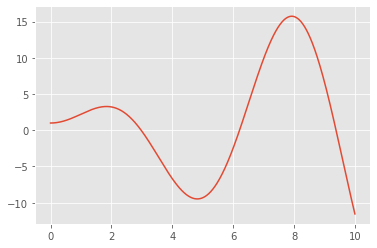

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
x = [0.01*i for i in range(0,1000)]
y = [2 *i * np.sin( i) + np.cos(i) for i in x]
plt.plot(x,y)

可以看到这个函数有许多局部极大值点，接下来我们使用遗传算法进行最优解的搜索。




### 种群初始化

随机生成若干个数的二进制染色体。

In [2]:
# -*-coding:utf-8 -*-
#目标求解2*x*sin(x)+cos(x)最大值
import random
import math
import matplotlib.pyplot as plt
#初始化生成chromosome_length大小的population_size个个体的二进制基因型种群
def species_origin(population_size,chromosome_length):
    population=[[]]
    #二维列表，包含染色体和基因
    for i in range(population_size):
        temporary=[]
        #染色体暂存器
        for j in range(chromosome_length):
            temporary.append(random.randint(0,1))
            #随机产生一个染色体,由二进制数组成
        population.append(temporary)
            #将染色体添加到种群中
    return population[1:]
            # 将种群返回，种群是个二维数组，个体和染色体两维

**编码**：将二进制的染色体基因型编码成十进制的表现型。

In [3]:
#从二进制到十进制
 #input:种群,染色体长度
def translation(population,chromosome_length):
    temporary=[]
    for i in range(len(population)):
        total=0
        for j in range(chromosome_length):
            total+=population[i][j]*(math.pow(2,j))
            #从第一个基因开始，每位对2求幂，再求和
            # 如：0101 转成十进制为：1 * 2^0 + 0 * 2^1 + 1 * 2^2 + 0 * 2^3 = 1 + 0 + 4 + 0 = 5
        temporary.append(total)
        #一个染色体编码完成，由一个二进制数编码为一个十进制数
    return temporary
   # 返回种群中所有个体编码完成后的十进制数

### 适应度计算

个体适应度与其对应的个体表现型$x$的目标函数值相关联，$x$越接近于目标函数的最优点，其适应度越大，从而其存活的概率越大。反之适应度越小，存活概率越小。这就引出一个问题关于适应度函数的选择，本例中，函数值总取非负值，**以函数最大值为优化目标，故直接将目标函数作为适应度函数**。这里我们直接将目标函数$2x\sin(x)+\cos(x)$作为个体适应度。如果，你想优化的是多元函数的话，需要将个体中基因型的每个变量提取出来，分别带入目标函数。比如说：我们想求$x_1+\ln(x_2)$的最大值。基因编码为4位编码，其中前两位是$x_1$，后两位是$x_2$。那么我们在求适应度的时候，需要将这两个值分别带入$f(x_1)=x$,$f(x_2)=\ln x$。再对$f(x_1)$和$f(x_2)$求和得到此个体的适应度。在本篇中，虽然染色体长度为10,但是实际上只有一个变量。

In [4]:
# 目标函数相当于环境 对染色体进行筛选，这里是2*sin(x)+cos(x)
def function(population,chromosome_length,max_value):
    temporary=[]
    function1=[]
    temporary=translation(population,chromosome_length)
    # 暂存种群中的所有的染色体(十进制)
    for i in range(len(temporary)):
        x=temporary[i]*max_value/(math.pow(2,chromosome_length)-1)
        #一个基因代表一个决策变量，其算法是先转化成十进制，然后再除以2的基因个数次方减1(固定值)。
        #function1.append(2*math.sin(x)+math.cos(x))
        function1.append(2*x*math.sin( x)+math.cos(x))
        #这里将2*sin(x)+cos(x)作为目标函数，也是适应度函数
    return function1

### 选择操作

(1).只保留非负值的适应度/函数值(不小于0)——避免轮盘赌出现负的概率

In [5]:
def fitness(function1):
    fitness1=[]
    min_fitness=mf=0
    for i in range(len(function1)):
        if(function1[i]+mf>0):
            temporary=mf+function1[i]
        else:
            temporary=0.0
        # 如果适应度小于0,则定为0
        fitness1.append(temporary)
        #将适应度添加到列表中
    return fitness1

(2).首先计算出所有个体的适应度总和$\sum f_i$

In [6]:
#计算适应度和
def sum(fitness1):
    total=0
    for i in range(len(fitness1)):
        total+=fitness1[i]
    return total
 
#计算适应度斐波纳挈列表，这里是为了求出累积的适应度
def cumsum(fitness1):
    for i in range(len(fitness1)-2,-1,-1):
        # range(start,stop,[step])
        # 倒计数
        total=0
        j=0
        while(j<=i):
            total+=fitness1[j]
            j+=1
        #这里是为了将适应度划分成区间
        fitness1[i]=total
        fitness1[len(fitness1)-1]=1

(3).再产生一个0到1之间的随机数，依据随机数出现在上述哪个概率区域内来确定各个个体被选中的次数。

In [7]:
#3.选择种群中个体适应度最大的个体
def selection(population,fitness1):
    new_fitness=[]
    #单个公式暂存器
    total_fitness=sum(fitness1)
    #将所有的适应度求和
    for i in range(len(fitness1)):
        new_fitness.append(fitness1[i]/total_fitness)
    #将所有个体的适应度概率化,类似于softmax
    cumsum(new_fitness)
    #将所有个体的适应度划分成区间
    ms=[]
    #存活的种群
    population_length=pop_len=len(population)
    #求出种群长度
    #根据随机数确定哪几个能存活
 
    for i in range(pop_len):
        ms.append(random.random())
    # 产生种群个数的随机值
    ms.sort()
    # 存活的种群排序
    fitin=0
    newin=0
    new_population=new_pop=population
 
    #轮盘赌方式
    while newin<pop_len:
        if(ms[newin]<new_fitness[fitin]):
            new_pop[newin]=pop[fitin]
            newin+=1
        else:
            fitin+=1
    population=new_pop

###  交叉

In [8]:
def crossover(population,pc):
#pc是概率阈值，选择单点交叉还是多点交叉，生成新的交叉个体，这里没用
    pop_len=len(population)
 
    for i in range(pop_len-1):
        cpoint=random.randint(0,len(population[0]))
        #在种群个数内随机生成单点交叉点
        temporary1=[]
        temporary2=[]
 
        temporary1.extend(pop[i][0:cpoint])
        temporary1.extend(pop[i+1][cpoint:len(population[i])])
        #将tmporary1作为暂存器，暂时存放第i个染色体中的前0到cpoint个基因，
        #然后再把第i+1个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
 
        temporary2.extend(pop[i+1][0:cpoint])
        temporary2.extend(pop[i][cpoint:len(pop[i])])
        # 将tmporary2作为暂存器，暂时存放第i+1个染色体中的前0到cpoint个基因，
        # 然后再把第i个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
        pop[i]=temporary1
        pop[i+1]=temporary2
        # 第i个染色体和第i+1个染色体基因重组/交叉完成

### 变异

In [9]:
#step4：突变
def mutation(population,pm):
    # pm是概率阈值
    px=len(population)
    # 求出种群中所有种群/个体的个数
    py=len(population[0])
    # 染色体/个体中基因的个数
    for i in range(px):
        if(random.random()<pm):
        #如果小于阈值就变异
            mpoint=random.randint(0,py-1)
            # 生成0到py-1的随机数
            if(population[i][mpoint]==1):
            #将mpoint个基因进行单点随机变异，变为0或者1
                population[i][mpoint]=0
            else:
                population[i][mpoint]=1

### 其他

In [10]:
# 将每一个染色体都转化成十进制 max_value为基因最大值，为了后面画图用
def b2d(b,max_value,chromosome_length):
    total=0
    for i in range(len(b)):
        total=total+b[i]*math.pow(2,i)
    #从第一位开始，每一位对2求幂，然后求和，得到十进制数？
    total=total*max_value/(math.pow(2,chromosome_length)-1)
    return total
 
#寻找最好的适应度和个体
def best(population,fitness1):
 
    px=len(population)
    bestindividual=[]
    bestfitness=fitness1[0]
 
    for i in range(1,px):
   # 循环找出最大的适应度，适应度最大的也就是最好的个体
        if(fitness1[i]>bestfitness):
 
            bestfitness=fitness1[i]
            bestindividual=population[i]
 
    return [bestindividual,bestfitness]

### 主程序

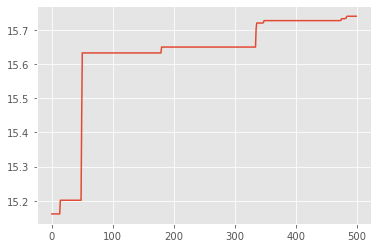

15.739587279022171


In [11]:
population_size=500
max_value=10
# 基因中允许出现的最大值
chromosome_length=10
pc=0.6
pm=0.01
np.random.seed(0)
 
results=[[]]
fitness1=[]
fitmean=[]
 
population=pop=species_origin(population_size,chromosome_length)
#生成一个初始的种群
 
for i in range(population_size):#注意这里是迭代500次
    function1=function(population,chromosome_length,max_value)
    fitness1=fitness(function1)
    best_individual,best_fitness=best(population,fitness1)
    results.append([best_fitness,b2d(best_individual,max_value,chromosome_length)])
     #将最好的个体和最好的适应度保存，并将最好的个体转成十进制
    selection(population,fitness1)#选择
    crossover(population,pc)#交配
    mutation(population,pm)#变异
 
results=results[1:]
results.sort()
X=[]
Y=[]
for i in range(500):#500轮的结果
    X.append(i)
    Y.append(results[i][0])
plt.plot(X,Y)
plt.show()
print(max(Y))

可以看到，在经过500代遗传以后，算法找到的最优解15.74。已经与原函数的最大值非常接近了。

作为对比,下面简单介绍一种基于贪婪思想的**爬山法**: 从搜索空间中随机产生邻近的点，从中选择对应解最优的个体，替换原来的个体，不断重复上述过程。

因为爬山法只对“邻近”的点作比较，所以目光比较“短浅”，常常只能收敛到离开初始位置比较近的局部最优解上面。对于存在很多局部最优点的问题，通过一个简单的迭代找出全局最优解的机会非常渺茫。（在爬山法中，袋鼠最有希望到达最靠近它出发点的山顶，但不能保证该山顶是珠穆朗玛峰，或者是一个非常高的山峰。因为一路上它**只顾上坡，没有下坡**。）

## 遗传算法总结


优点：
 - 可以解决复杂的实际问题
 - 求解思路比较简单（与纯数学方法比较）
 - 算法计算时间与问题相关性不大

缺点： 	
 - 算法要根据问题调整
 - 求出的解是满意解，只能接近最优解
 - 存在算法不适用的情况，并且难以判断原因